# Neural style transfer

"Neural Style Transfer" (Sinirsel Stil Aktarımı), aslında bir resim oluşturma sanatıdır ve derin öğrenmeyi kullanır. Kısaca, bir görüntü alır ve başka bir görüntünün tarzını ona uygular. Yani, bir fotoğrafınızı alıp, sanki Picasso veya Van Gogh tarafından çizilmiş gibi görünmesini sağlar. Bu eğlenceli ve ilginç bir teknoloji ve bu alanda yapılan ilk çalışmalar "A Neural Algorithm of Artistic Style (Gatys et al.)" başlıklı makalede anlatılmıştır.

Bu algoritma, görüntünün içeriğini belirli bir tarza, yani başka bir görüntünün tarzına uyacak şekilde düzenler. Ancak bu süreç biraz zaman alabilir. Daha yeni yaklaşımlar, stilize edilmiş görüntüyü doğrudan oluşturacak bir model eğitir, bu da işlemleri daha hızlı hale getirir - bazen eski yöntemden 1000 kat daha hızlı!

TensorFlow Hub'da, önceden eğitilmiş bir modelle hızlı stil aktarımının nasıl yapılacağını gösteren bir öğretici bulabilirsiniz. Ayrıca TensorFlow Lite kullanılarak tarz aktarımının nasıl yapıldığına dair örnekler de bulunmaktadır.

Stil aktarımı, bir içerik görüntüsü ve bir stil referans görüntüsü (örneğin, ünlü bir ressamın sanat eseri) alır ve ikisini birleştirir. Sonuç olarak elde edilen görüntü, içerik görüntüsüne benzer, ancak stil referans görüntüsünün tarzında "resmedilmiş" olarak görünür. Bu, görüntüyü, içerik görüntüsünün içerik istatistiklerine ve stil referans görüntüsünün stil istatistiklerine uyacak şekilde optimize etmekle gerçekleştirilir. Bu istatistikler, görüntülerden bir evrişimli ağ (CNN) kullanılarak çıkarılır.

Python kütüphanelerini içe aktarmakta ve bu kütüphaneler genellikle veri işleme, makine öğrenmesi modelleme, veri görselleştirme ve işletim sistemi ile etkileşim gibi işlemler için kullanılmaktadır.

os işletim sistemi ile etkileşime geçmek için kullanılır.
tensorflow ise genellikle makine öğrenmesi ve derin öğrenme modellemesi için kullanılan bir kütüphanedir.
IPython.display ve matplotlib veri ve sonuçları görselleştirmek için kullanılır.
numpy bilimsel hesaplamalar ve veri manipülasyonları için genellikle kullanılan bir kütüphanedir.
PIL.Image ve time genellikle görüntü işleme ve zaman tabanlı işlemler için kullanılır.
functools fonksiyonel programlama araçları sağlar, kodu daha verimli ve okunabilir hale getirir.
Bu kütüphanelerin hepsinin bir arada kullanılması genellikle bir veri bilimi veya makine öğrenmesi projesinde görülür.


In [1]:
import os
import tensorflow as tf
import IPython.display as display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import PIL.Image
import time
import functools

Tensorü görsele çeviren fonksiyon tanımlama

In [2]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

Drive bağlantısını yapma

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Opsiyonel: Web üzerinden görsel kullanmak için

In [ ]:
#Opsiyonel: Web üzerinden görsel kullanmak için
#content_path = tf.keras.utils.get_file('resimadi.uzantisi[*.jpg,*.png]', 'dosya konumu [http://www.dosyayolu.uzanti]')
#style_path = tf.keras.utils.get_file('stildosyasi.uzantisi[*.jpg,*.png]', 'dosya konumu [http://www.dosyayolu.uzanti]')


## Visualize the input

Bir görüntüyü yüklemek ve maksimum boyutunu 512 pikselle sınırlamak için fonksiyon tanımlama

In [4]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim
  new_shape = tf.cast(shape * scale, tf.int32)
  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

Colab veya lokal sistemden görsel kullanmak için

In [5]:
content_path = '/content/drive/MyDrive/YSAveDO/stil_transfer_image/gorsel.png'
style_path = ['/content/drive/MyDrive/YSAveDO/stil_transfer_image/style1.png',
              '/content/drive/MyDrive/YSAveDO/stil_transfer_image/style2.png',
              '/content/drive/MyDrive/YSAveDO/stil_transfer_image/style3.png',
              '/content/drive/MyDrive/YSAveDO/stil_transfer_image/style4.png',
              '/content/drive/MyDrive/YSAveDO/stil_transfer_image/style5.png']

İçerik adres yolundan resmi yükleme


In [9]:
content_image = load_img(content_path)


TensorFlow Hub modelini yükleyin

In [6]:
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')


Kullanılacak dosyanın ve stil dosyalarının görüntülenmesi

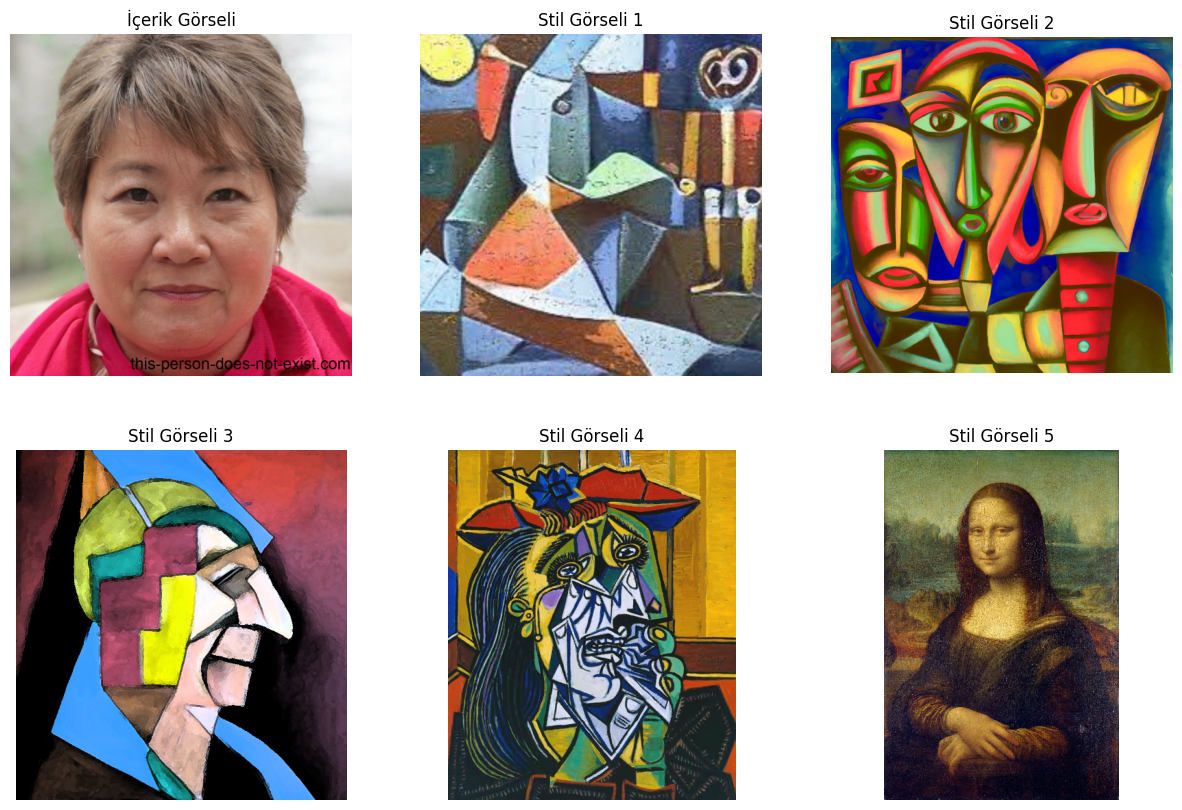

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(np.squeeze(content_image))
axs[0, 0].set_title('İçerik Görseli')
axs[0, 0].axis('off')
for i in range(5):
    style_image = load_img(style_path[i])
    axs[(i+1)//3, (i+1)%3].imshow(np.squeeze(style_image))
    axs[(i+1)//3, (i+1)%3].set_title(f'Stil Görseli {i+1}')
    axs[(i+1)//3, (i+1)%3].axis('off')
plt.show()

## Fast Style Transfer using TF-Hub

This tutorial demonstrates the original style-transfer algorithm, which optimizes the image content to a particular style. Before getting into the details, let's see how the [TensorFlow Hub model](https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2) does this:

Stil uygulanmış resimleri oluşturun ve listeye ekleyin


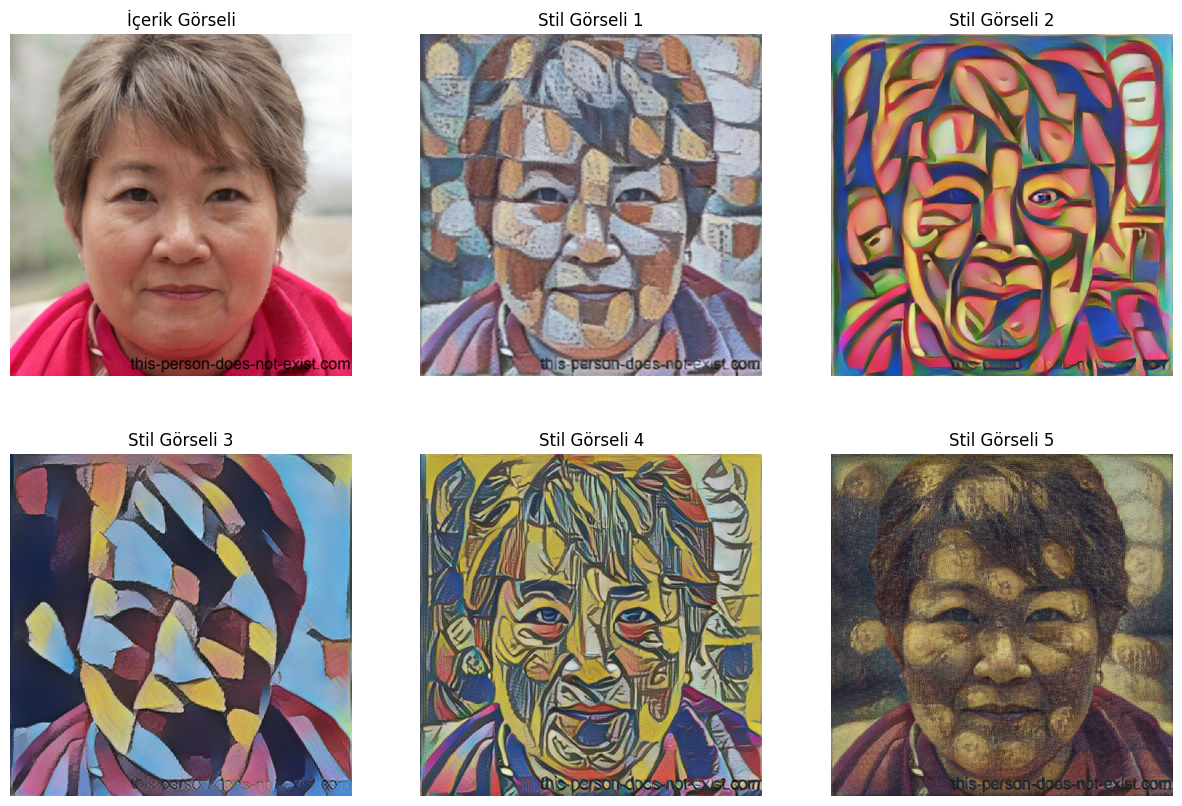

In [11]:
stylized_images = []
for i in range(5):
    stylized_image = hub_model(tf.constant(content_image),
                               tf.constant(load_img(style_path[i])))[0]
    stylized_images.append(stylized_image)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(np.squeeze(content_image))
axs[0, 0].set_title('İçerik Görseli')
axs[0, 0].axis('off')
for i in range(5):
    axs[(i+1)//3, (i+1)%3].imshow(np.squeeze(stylized_images[i]))
    axs[(i+1)//3, (i+1)%3].set_title(f'Stil Görseli {i+1}')
    axs[(i+1)//3, (i+1)%3].axis('off')
plt.show()

Kameradan görsel kullanmak için gerekli kütüphaneler

In [12]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
from base64 import b64decode, b64encode

JS nesnesile alınan görseli numpy nesnesine dönüstürür

In [13]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

Web kamerasından göüntü almak için kullanılan JS kodu

In [17]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Çıktıyı video öğesine uyacak şekilde yeniden boyutlandırma
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Capture butonunun tıklanmasını bekletme
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  # Fotoğraf verilerini alma
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)
  cv2.imwrite(filename, img)
  return filename

Görüntüyü alıp kaydeden kod

In [ ]:
try:
  filename = take_photo('/content/drive/MyDrive/YSAveDO/stil_transfer_image/webcam.jpg')
  print('Kayıt yeri :  {}'.format(filename))
    # Web kamerasından çekilen fotoğrafı gösterme
  display(Image(filename))
except Exception as err:
  # Kullanıcının web kamerası yoksa veya sayfaya erişim izni vermezse hata verilir
  print(str(err))

<IPython.core.display.Javascript object>

Stil uygulanmış resimleri oluşturun ve listeye ekleyin

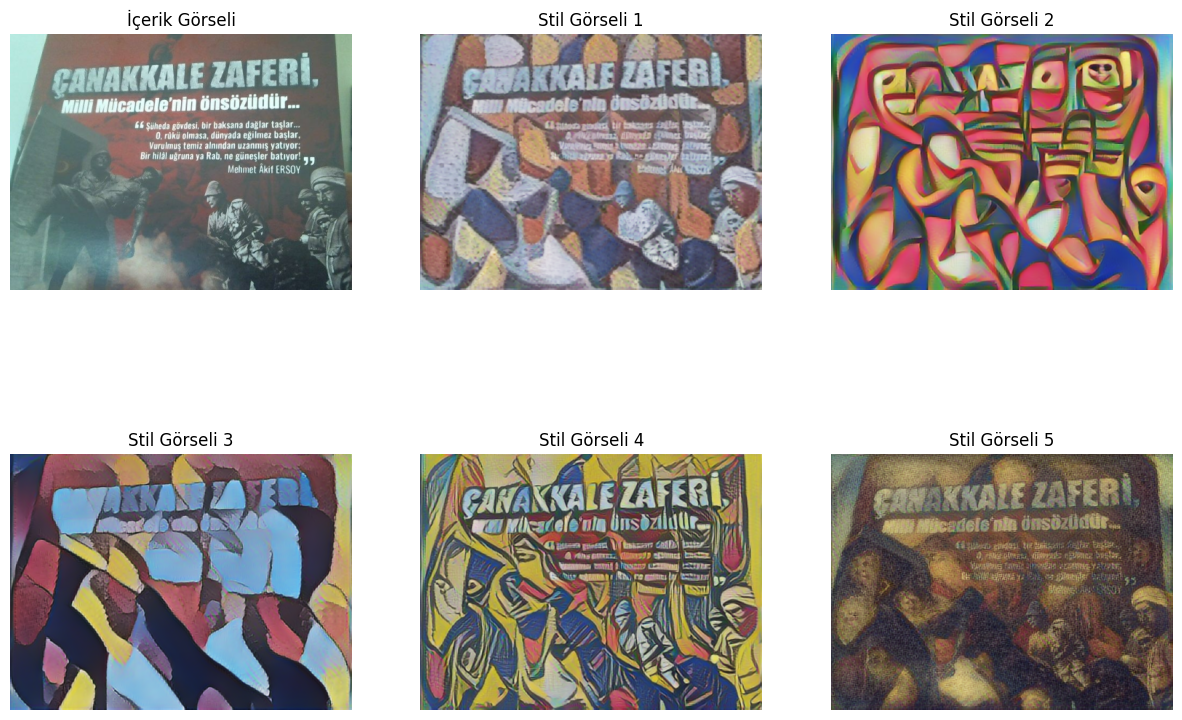

In [ ]:
content_image = load_img('/content/drive/MyDrive/YSAveDO/stil_transfer_image/webcam.jpg')
stylized_images = []
for i in range(5):
    stylized_image = hub_model(tf.constant(content_image), tf.constant(load_img(style_path[i])))[0]
    stylized_images.append(stylized_image)
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(np.squeeze(content_image))
axs[0, 0].set_title('İçerik Görseli')
axs[0, 0].axis('off')
for i in range(5):
    axs[(i+1)//3, (i+1)%3].imshow(np.squeeze(stylized_images[i]))
    axs[(i+1)//3, (i+1)%3].set_title(f'Stil Görseli {i+1}')
    axs[(i+1)//3, (i+1)%3].axis('off')
plt.show()